# 7/6

In [1]:
# 홈페이지를 로컬에 파일로 저장

import urllib
request = urllib.request.Request('https://naver.com')
data = urllib.request.urlopen(request).read()
f = open('pc.html','wb')
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
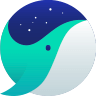
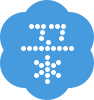

In [2]:
with open('pc.html','rb') as f:
    data = f.read().decode('utf-8')
    print(data)

In [3]:
!conda list ### bs4 깔려있는지 확인

# packages in environment at /Users/hyunjeongjo/opt/anaconda3:
#
# Name                    Version                   Build  Channel
_py-xgboost-mutex         2.0                       cpu_0    anaconda
anaconda-client           1.9.0            py38hecd8cb5_0  
anaconda-navigator        2.1.1                    py38_0  
appnope                   0.1.2           py38hecd8cb5_1001  
argon2-cffi               20.1.0           py38h9ed2024_1  
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
backports                 1.0                pyhd3eb1b0_2  
backports.functools_lru_cache 1.6.4              pyhd3eb1b0_0  
backports.tempfile        1.0                pyhd3eb1b0_1  
backports.weakref         1.0.post1                  py_1  
beautifulsoup4            4.10.0             pyh06a4308_0  
blas                      1.0                         mkl  
bleach      

In [4]:
!pip install bs4 ### 없으면 install

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=282f4016f0bceb03c0e00f1ac8d6ac16e0bca8e15da96b8ad235980079c163e5
  Stored in directory: /Users/hyunjeongjo/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

In [7]:
from bs4 import BeautifulSoup

### BeautifulSoup과 태그를 이용하여 원하는 부분 추출하기
### html의 기본 구조는 아래와 같음.

html = """
<html>
<head>
</head>
<body>
   <h1>스크레이핑이란?</h1>
   <p>웹 페이지를 분석하는 것</p>
   <p>원하는 부분을 추출하는 것</p>
</body>
</html>
"""

soup = BeautifulSoup(html, 'html.parser') ### 파싱!
h1 = soup.body.h1
p1 = soup.body.p
p2 = p1.next_sibling.next_sibling
print(h1)
print(h1.string)
print(p1.string)
print(p2.string)

<h1>스크레이핑이란?</h1>
스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


find() : HTML 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴     ###속성 예: id, class ...

In [8]:
# id로 요소를 찾는 방법
from bs4 import BeautifulSoup
html = """
<body>
   <h1 id='title'>스크레이핑이란?</h1>
   <p id='body'>웹 페이지를 분석하는 것</p>
   <p>원하는 부분을 추출하는 것</p>
</body>
"""

soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string)
print(body.string)

스크레이핑이란?
웹 페이지를 분석하는 것


html 태그 정리 참고 : https://pridiot.tistory.com/6

- \<html> : 웹페이지의 시작과 끝  
- \<head> : 위에 탭에 적힌 제목. 안에 \<title>,\<meta> 등  
- \<body> : 브라우저에 실제 표시되는 내용  
- \<title> :문서 제목. 웹브라우저의 제목 표시줄  
- \<meta> : 문자 인코딩 및 문서 키워드, 요약정보  
- \<div> : 아무런 의미 X, 컨텐츠들을 어떤 목적에 따라 묶어야 할 때 사용(줄바꿈O)  
- \<span> : 아무런 의미 X, 컨텐츠들을 어떤 목적에 따라 묶어야 할 때 사용(줄바꿈X)  
- \<a> : 웹페이지나 외부 사이트 연결. 속성 값은 target, title, id  
- \<script> : 코드 삽입  
- \<link> : 외부 파일을 연결할 때 사용  
- \<img> : 이미지 삽입  
- \<p> : 단락. 사용하면 내용 앞 뒤로 빈 줄이 생기면서 단락이 생김.  
- \<li> : \<ul>과 \<ol>안에서 각 항목을 나열할 때 사용  
- \<ul> : unordered list, 순서가 없는 list  
- \+\<ol> : oloredred list, 순서가 있는 list  

In [9]:
# 여러 개의 요소 추출

html = """
<html><body>
  <ul>
   <li><a href="http://www.naver,com">naver</a></li>
   <li><a href="http://daum.net">daum</a></li>
 </ul>
</body></html>
"""

soup = BeautifulSoup(html,'html.parser')
links = soup.find_all('a')
for a in links:
    href = a.attrs['href'] ### 속성은 대괄호/ (attrs:속성값)
    text = a.string
    print(text, href)

naver http://www.naver,com
daum http://daum.net


In [10]:
# urlopen() 과 BeautifulSoup 조합

from bs4 import BeautifulSoup
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
# urlopen()으로 데이터 가져오기 --- (※1)
res = req.urlopen(url)

# BeautifulSoup으로 분석하기 --- (※2)
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기 --- (※3)
title = soup.find("title").string
wf = soup.find("wf").string
print(title)
print(wf)

기상청 육상 중기예보
○ (강수) 5일(수)과 6일(목)은 제주도에 흐리고 비가 오겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 -10~2도, 낮 기온은 1~10도로 오늘(1일, 아침최저기온 -15~-4도, 낮최고기온 0~7도)보다 높겠습니다.


find_all( ):
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_(생략 가능)로 클래스를 직접 사용. 혹은 attrs에서 속성=값으로 필터링

In [11]:
import requests
from bs4 import BeautifulSoup
req = requests.get('https://www.naver.com')
html = req.text
# print(html)
soup = BeautifulSoup(html, 'html.parser')
result = soup.find_all('a', class_='link_set')
result
result1 = soup.find_all('a', class_="_2aeXMlrb")
result1

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #05c3a7">다운로드</span></a>]

In [12]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)
print(soup.img)
print(soup.img['alt'])
print(soup.a)
print(soup.a['href'])
print(soup.a.string)

<title>NAVER</title>
title
NAVER
<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_greendrop_v3@2x.png" style="padding-left: 58px" width="240"/>

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
#newsstand
뉴스스탠드 바로가기


In [14]:
### 제한걸기(limit 사용)
print(soup.find_all('a',limit=2)) ### limit 숫자 만큼 나옴

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>]


In [15]:
### 제한걸기(index 사용)
print(soup.find_all('a')[0])

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [16]:
print(soup.find_all('div',id='u_skip'))

[<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>]


In [17]:
print(soup.find_all('span',class_='blind',limit=2))

[<span class="blind">NAVER whale</span>, <span class="blind">쥬니어네이버</span>]


In [18]:
print(soup.find_all('span',attrs={'class':'blind'},limit=2))

[<span class="blind">NAVER whale</span>, <span class="blind">쥬니어네이버</span>]


In [19]:
# 딕셔너리 밸류값 리스트로 주기!
soup.find_all('span',attrs={'class':['blind', 'item']},limit=10) 

[<span class="blind">NAVER whale</span>,
 <span class="blind">쥬니어네이버</span>,
 <span class="blind">해피빈</span>,
 <span class="blind">검색</span>,
 <span class="blind">한글 입력기</span>,
 <span class="blind">자동완성 레이어</span>,
 <span class="item">추첨 @13@.</span>,
 <span class="item">지급기한 1년</span>,
 <span class="item"><i class="imsc ico_arr"></i>@8@(@9@%)</span>,
 <span class="item">@7@, @message@</span>]

In [20]:
import re
print(soup.find_all(string=re.compile('네이버')))

['네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', '블로그씨, 진즉에 기사 났는데 안 읽었나요-??! 산타 할아버지 못 오셔서 선물 못받아요- 다음주면 집에 가는 날~~ 이것저것 주문하긴 했는데 우체국 택배로 올게 뭐가있나,, 고민 뭐지-? 받는 사람은 나 맞는데, 내가 뭐 주문했지-?? 가...방...?? 알록달록한 이 가방은 무엇인가 했더니 네이버 해피빈 펀딩 중 하나인 봉제장인이 업사이클링 한 커피빈백', '방금 데어 데어 포스팅하고 네이버 블로그가 콩 준다고 해서 이동했다가.. 학교 밖 청소년을 위한 도마와 와인 거치대에 펀딩을 하고 말았습니다... 벌써 526%나 달성한 펀딩이긴 하지만, 실용적이고 예쁜 캄포 도마와 와인 거치대로 학교 밖 청소년들을 응원할 수 있다니 너무 좋은 것 같아서 링크 걸게요:-) 학교 밖 청소년은 평소에도 제가 응원하고자 하는 분', '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


select_one( ), select( )
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 .으로 id는 #으로 표시

In [21]:
from bs4 import BeautifulSoup
html = """
<html>
<body>
<div id="meigen">
  <h1>위키북스 도서</h1>
  <ul class="items">
    <li>유니티 게임 이펙트 입문</li>
    <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
    <li>모던 웹사이트 디자인의 정석</li>
  </ul>
</div>
</body>
</html>
"""
soup = BeautifulSoup(html,'html.parser')
h1 = soup.select_one('div#meigen > h1').string
print(h1)
li_list = soup.select('div#meigen > ul.items > li')
for li in li_list:
    print(li.string)

위키북스 도서
유니티 게임 이펙트 입문
스위프트로 시작하는 아이폰 앱 개발 교과서
모던 웹사이트 디자인의 정석


In [22]:
# Q. 네이버 환율 가져와서 출력하세요.(https://finance.naver.com/marketindex/)
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")
value = soup.select_one('span.value')
print('usd/krw =',value.string)

usd/krw = 1,190.50


In [24]:
from bs4 import BeautifulSoup

fp = open("fruits-vegetables.html",encoding='utf-8')
soup = BeautifulSoup(fp, "html.parser")
print(soup)

print('-'*100)

print(soup.select_one('ul#fr-list > li.yellow').string)


print('-'*100)

yellow_li = soup.select('ul#fr-list > li.yellow')
for i in yellow_li:
    print(i.string)

print('-'*100)

    
print(soup.select_one('ul#fr-list > li[data-lo="ko"]').string)
print('-'*50)
print(soup.select_one('#ve-list > li:nth-of-type(5)').string)
print('-'*50)

print(soup.select_one('ul#ve-list > li[data-lo=us]').string)

<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html>
----------------------------------------------------------------------------------------------------
레몬
----------------------------------------------------------------------------------------------------
레몬
오렌지
----------------------------------------------------------------------------------------------------
사과
--------------------------------------------------
연근
--------------------------------------------------
파프리카


In [25]:
# 서로 다른 방법으로 아보카드 5번 출력

print(soup.select_one("#ve-list > li:nth-of-type(4)").string)
print(soup.select("#ve-list > li[data-lo='us']")[1].string) 
print(soup.select("#ve-list > li.black")[1].string)  
# find 메서드로 추출하기 
cond = {"data-lo":"us", "class":"black"}
print(soup.find("li", cond).string)
# find 메서드를 연속적으로 사용하기 
print(soup.find(id="ve-list")
           .find("li", cond).string)

아보카도
아보카도
아보카도
아보카도
아보카도


In [26]:
# Q. 정규표현식과 BeautifulSoup을 이용하여 https가 포함된 url만 출력하세요.
from bs4 import BeautifulSoup
import re
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""

soup = BeautifulSoup(html, 'html.parser')
list_find = soup.find_all(href=re.compile('^https'))
print(list_find)
for find in list_find:
    print(find['href'])

[<a href="https://example.com/fuga">fuga*</a>, <a href="https://example.com/foo">foo*</a>]
https://example.com/fuga
https://example.com/foo


In [27]:
# Q. 'https://www.naver.com'으로 부터
# <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>을 출력하세요.
import requests
from bs4 import BeautifulSoup

req = requests.get('https://naver.com')
html = req.text
soup = BeautifulSoup(html, 'html.parser')
print(soup.select_one('a'))
print(soup.select_one('a')['href'])

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
#newsstand


In [30]:
# Q. 'https://www.naver.com'으로 부터
# <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>을 출력하세요.


import re
import urllib
from bs4 import BeautifulSoup

response = urllib.request.Request("http://www.naver.com")
data = urllib.request.urlopen(response).read().decode('utf-8')
soup = BeautifulSoup(data,'html.parser')
soup.find_all(href=re.compile('^#newsstand'))

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>]

In [38]:
# prettify() 함수를 이용하면 보기 좋게 출력할 수 있음
from bs4 import BeautifulSoup

html = """<html> <head><title>test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>"""

soup = BeautifulSoup(html, 'html.parser')
print(soup)
print('-'*50)
print(soup.prettify())

<html> <head><title>test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>
--------------------------------------------------
<html>
 <head>
  <title>
   test site
  </title>
 </head>
 <body>
  <p>
   test
  </p>
  <p>
   test1
  </p>
  <p>
   test2
  </p>
 </body>
</html>


In [39]:
!pip install lxml

In [40]:
import requests
from bs4 import BeautifulSoup

req = requests.get('https://naver.com')
html = req.text
soup = BeautifulSoup(html, 'lxml')
print(soup.select_one('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
